# Programming Assignment 4

In [70]:
# Import required packages
import numpy as np
from sklearn.decomposition import NMF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from tqdm import tqdm
import pandas as pd

## Question 1

<hr>
Implement the multiplicative NMF algorithm discussed in class. Write a function lee_seung(V, k, maxiteration) that takes a nonnegative matrix V and returns W and H.  For test, create a random nonnegative matrix of dimension 200x500 where the elements are uniformly distributed in [0,1]. Print the value of the relative error $ \|V-WH\|_F /\|V\|_F$.

Use the ScikitLearn NMF class for the same factorization and compare the relative error.

In [56]:
# Your code comes here
rng = np.random.default_rng()
test = rng.random(size=(200, 500))

def lee_seung(V, k, maxiteration):
    m = V.shape[0]
    n = V.shape[1]
    W = rng.random(size=(m, k))
    H = rng.random(size=(k, n))
    err = 1
    epsilon = 0.0001
    for iter in tqdm(range(maxiteration), leave=False, desc="Lee_seung"):
        H = np.multiply(H, np.divide(W.T @ V, W.T @ W @ H))
        W = np.multiply(W, np.divide(V @ H.T, W @ H @ H.T))
        err = np.linalg.norm(V - W @ H, ord="fro")
        if(err < epsilon):
            # force tqdm to disappear
            iter = maxiteration - 1
            break
    return W, H

fro_V = np.linalg.norm(test, ord="fro")
W, H = lee_seung(test, 50, 1000)
compare = NMF(n_components = 50, max_iter = 1000, init="random", solver= "mu")
W2 = compare.fit_transform(test)
H2 = compare.components_
print(f"Relative error for my implementation: {np.linalg.norm(test - W @ H, ord = 'fro')/np.linalg.norm(test, ord='fro')}")
print(f"Relative error for sklearn implementation: {np.linalg.norm(test - W2 @ H2, ord = 'fro')/np.linalg.norm(test, ord='fro')}")

Relative error for my implementation: 0.3930678129030214
Relative error for sklearn implementation: 0.395014920289869


## Question 2

<hr>
Find the nonnegative basis representation of images from one of the following databases or some other facial databases. Show a comparison of some sample images with their reconstruction from the basis.

>- The ORL database of faces at [Kaggle](https://www.kaggle.com/datasets/kasikrit/att-database-of-faces).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [Kaggle](https://www.kaggle.com/datasets/olgabelitskaya/yale-face-database).

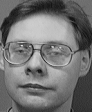

Original s4/3.pgm


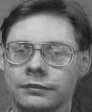

Reconstruction s4/3.pgm


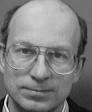

Original s13/2.pgm


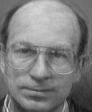

Reconstruction s13/2.pgm


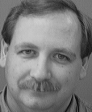

Original s25/9.pgm


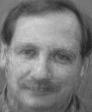

Reconstruction s25/9.pgm


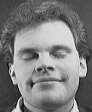

Original s36/5.pgm


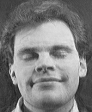

Reconstruction s36/5.pgm


In [63]:
# Your code starts here.
# Using ORL Database
images = np.zeros((112*92, 400))
ind = 0
ignore = ["README", "auto-mpg.data", "auto-mpg.names"]
# Using sorted to ensure predictable image order in matrix
for f in sorted(os.listdir("data/"), key=lambda k: int(k[1:]) if k not in ignore else 0):
    if f not in ignore:
        for i in os.listdir(f"data/{f}"):
            im = Image.open(f"data/{f}/{i}")
            images[:,ind] = np.array(im).flatten()
            ind += 1
        
W, H = lee_seung(images, 400, 1000)
display(Image.fromarray(np.reshape(images[:,33], (112,92))).convert(mode="RGB"))
print("Original s4/3.pgm")
display(Image.fromarray(np.reshape((W @ H)[:,33], (112,92))).convert(mode="RGB"))
print("Reconstruction s4/3.pgm")

display(Image.fromarray(np.reshape(images[:,122], (112,92))).convert(mode="RGB"))
print("Original s13/2.pgm")
display(Image.fromarray(np.reshape((W @ H)[:,122], (112,92))).convert(mode="RGB"))
print("Reconstruction s13/2.pgm")

display(Image.fromarray(np.reshape(images[:,249], (112,92))).convert(mode="RGB"))
print("Original s25/9.pgm")
display(Image.fromarray(np.reshape((W @ H)[:,249], (112,92))).convert(mode="RGB"))
print("Reconstruction s25/9.pgm")

display(Image.fromarray(np.reshape(images[:,355], (112,92))).convert(mode="RGB"))
print("Original s36/5.pgm")
display(Image.fromarray(np.reshape((W @ H)[:,355], (112,92))).convert(mode="RGB"))
print("Reconstruction s36/5.pgm")


## Question 3
<hr>
Set up a linear regression model for the miles per gallon on the data at automobile [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/).  **Discard** the categorical data.

>1. Get feature matrix X, and target variable y.
>1. Split data into training and testing.
>1. Normalize data using MinMaxScaler.
>1. Creat a LinearRegression object for modeling.
>1. Train the model with training data.
>1. Look at R^2 score for the goodness of fit for the train and test data.
>1. Present a graphical comparison of true and observed responses for the test data.

In [79]:
# Note, I edited the data file to be a proper csv for ease of reading
# the data into the program. I also included the column names as the 
# first row of the data file. I've also removed the rows with missing horsepower
data = pd.read_csv("data/auto-mpg.data")
data.drop("car name", inplace=True, axis=1)
data.drop("model year", inplace=True, axis=1)
data.drop("origin", inplace=True, axis=1)

X = data.drop("mpg", axis=1)
y = data["mpg"]

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)

normalizer = MinMaxScaler((0,10), copy=True)
normalizer.fit(X)
trainX = normalizer.transform(trainX)
testX = normalizer.transform(testX)

reg = LinearRegression()
reg.fit(trainX, trainY)

print(f"R-Squared on train data: {reg.score(trainX, trainY)}")
print(f"R-Squared on test data: {reg.score(testX, testY)}")

R-Squared on train data: 0.7071594344849214
R-Squared on test data: 0.693820636460242
